In [42]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
class Energy:
    def __init__(self) -> None:
        url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
        req = requests.get(url)
        url_content = req.content
        csv_file = open('./data.csv', 'wb')
        csv_file.write(url_content)
        csv_file.close()
        self.data = pd.read_csv("data.csv")

    def print_data(self):
        return self.data.head()

    def clean_data(self):
        self.data = self.data.fillna(0)
        self.data = self.data[["country", "year", "gdp", "renewables_energy_per_capita", "fossil_energy_per_capita"]].reset_index().drop(["index"], axis=1)
        self.data = self.data[(self.data["year"] >= 1970)&(self.data["year"] <= 2018)]        
        self.data["year"] = pd.DatetimeIndex(pd.to_datetime(self.data["year"], format="%Y")).year


    def filter_countries(self, countries:list):
        self.data = self.data.set_index("country").T[countries].T.reset_index()
        try:
            self.data = self.data.set_index("year")
        except KeyError:
            pass

    def plots(self, type:str, countries:list):
        plt.figure(figsize=(16,8))
        for c in countries:
            if type=="renewables":
                plt.plot(self.data[self.data["country"]==c].renewables_energy_per_capita)
                plt.legend(countries)
            elif type=="fossil":
                plt.plot(self.data[self.data["country"]==c].fossil_energy_per_capita)
                plt.legend(countries)                
            elif type=="gdp":
                plt.plot(self.data[self.data["country"]==c].gdp)
                plt.legend(countries)                
      



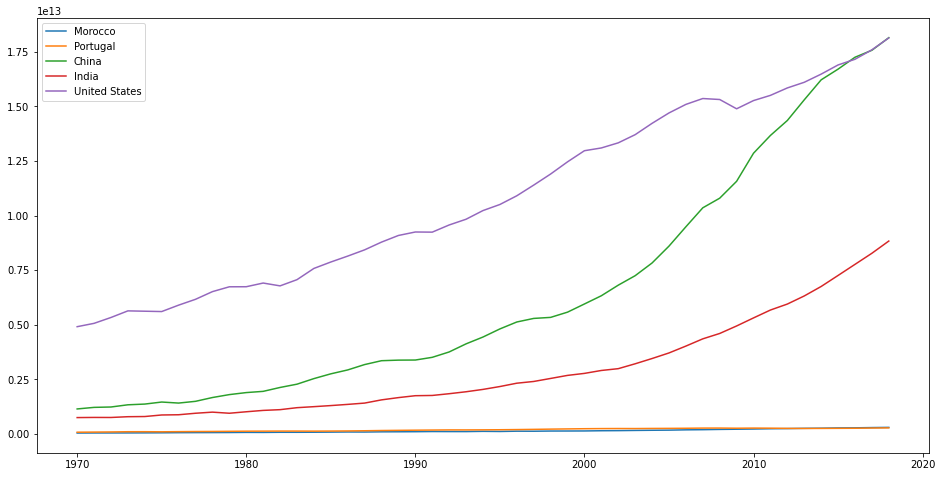

In [56]:
countries =["Morocco","Portugal","China","India","United States"]
df = analysis.data.set_index("year")
plt.figure(figsize=(16,8))
for c in countries:
    plt.plot(df[df["country"]==c].gdp)
    plt.legend(countries)


In [74]:
analysis = Energy()

In [75]:
analysis.print_data()
analysis.clean_data()
analysis.print_data()

,country,year,gdp,renewables_energy_per_capita,fossil_energy_per_capita
70,Afghanistan,1970,1.581223e+10,0.0,0.0
71,Afghanistan,1971,1.577051e+10,0.0,0.0
72,Afghanistan,1972,1.317055e+10,0.0,0.0
73,Afghanistan,1973,1.356863e+10,0.0,0.0
74,Afghanistan,1974,1.430911e+10,0.0,0.0


In [76]:
analysis.filter_countries(["Morocco","Portugal","China","India","United States"])

In [77]:
analysis.data

,country,gdp,renewables_energy_per_capita,fossil_energy_per_capita
year,,,,
1970.0,Morocco,4.098229e+10,248.683,1647.438
1971.0,Morocco,4.329574e+10,274.886,1699.318
1972.0,Morocco,4.431738e+10,282.649,1806.962
1973.0,Morocco,4.589562e+10,206.747,2066.541
1974.0,Morocco,4.838264e+10,227.041,2152.233
...,...,...,...,...
2014.0,United States,1.648266e+13,5924.802,68806.258
2015.0,United States,1.690258e+13,5992.863,67488.484
2016.0,United States,1.716256e+13,6597.770,66291.781


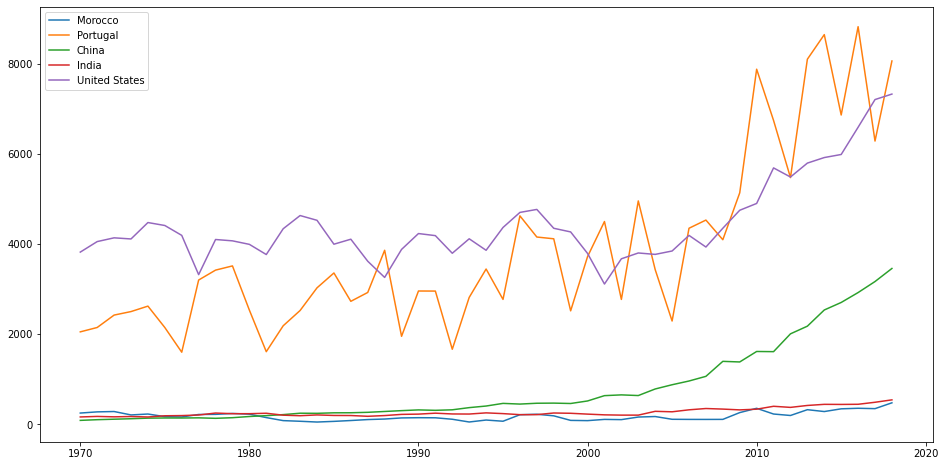

In [82]:
analysis.plots("renewables", countries=["Morocco","Portugal","China","India","United States"])

In [60]:
countries =["Morocco","Portugal","China","India","United States"]

In [61]:
data = data.set_index("country").T[countries].T.reset_index()

In [62]:
data = data.fillna(0)

In [63]:
data

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Morocco,1900,MAR,4696531.0,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,Morocco,1901,MAR,4760725.0,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Morocco,1902,MAR,4831961.0,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Morocco,1903,MAR,4910411.0,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Morocco,1904,MAR,4990135.0,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,United States,2017,USA,325084736.0,1.759628e+13,0.202,0.825,1261.375,410.054,192.965,...,1.814,0.805,12.031,69.804,683.609,790.168,256.871,2102.865,5.970,2.648
606,United States,2018,USA,327096256.0,1.814065e+13,-1.325,-5.433,1237.008,404.621,189.027,...,2.114,0.932,7.222,45.081,728.691,842.020,275.422,2227.756,6.173,2.723
607,United States,2019,USA,329064896.0,0.000000e+00,2.780,11.250,1263.794,415.870,174.768,...,2.448,1.071,8.514,59.126,787.816,908.244,298.871,2394.106,6.775,2.965
608,United States,2020,USA,331002656.0,0.000000e+00,-9.029,-37.549,1142.955,378.321,165.255,...,3.082,1.410,14.214,108.672,896.488,1031.265,341.352,2708.401,7.967,3.645


In [64]:
#fossil_energy_per_capita	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
#renewables_energy_per_capita	Per capita primary energy consumption from renewables, measured in kilowatt-hours
new_data = data[["country", "year", "gdp", "renewables_energy_per_capita", "fossil_energy_per_capita"]]

In [65]:
new_data = new_data.set_index("year")

In [67]:
import matplotlib.pyplot as plt
new_data = new_data.drop(2020)

In [74]:
new_data = new_data.drop(2021)

In [76]:
new_data = new_data.drop(2019)

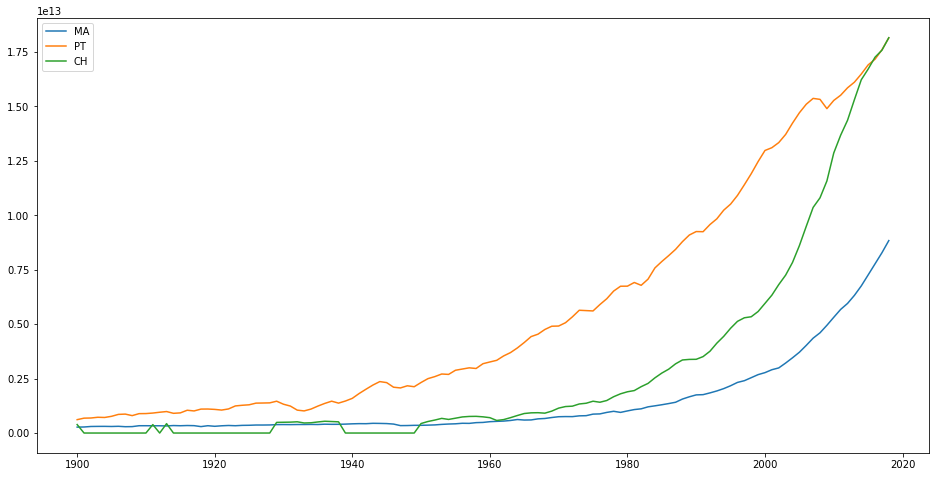

In [77]:
plt.figure(figsize=(16,8))
plt.plot(new_data[new_data["country"]=="India"].gdp)
plt.plot(new_data[new_data["country"]=="United States"].gdp)
plt.plot(new_data[new_data["country"]=="China"].gdp)
plt.legend(["MA","PT","CH"])

In [79]:
from pmdarima import auto_arima
best_consumption = auto_arima(new_data[new_data["country"]=="China"].gdp,
                                      start_p=3,
                                      start_q=3,
                                      max_p=8,
                                      max_q=8,
                                      max_order=20,
                                      d=None,
                                      m=1,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=False
                                      )

 ARIMA(0,2,0)(0,0,0)[1]             : AIC=6440.426, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[1]             : AIC=6386.243, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[1]             : AIC=6387.121, Time=0.08 sec
 ARIMA(0,2,3)(0,0,0)[1]             : AIC=6388.902, Time=0.09 sec
 ARIMA(0,2,4)(0,0,0)[1]             : AIC=6392.195, Time=0.13 sec
 ARIMA(0,2,5)(0,0,0)[1]             : AIC=6394.346, Time=0.21 sec
 ARIMA(0,2,6)(0,0,0)[1]             : AIC=6395.604, Time=0.22 sec
 ARIMA(0,2,7)(0,0,0)[1]             : AIC=6399.365, Time=0.22 sec
 ARIMA(0,2,8)(0,0,0)[1]             : AIC=6401.774, Time=0.25 sec
 ARIMA(1,2,0)(0,0,0)[1]             : AIC=6398.435, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[1]             : AIC=6386.761, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[1]             : AIC=6388.701, Time=0.14 sec
 ARIMA(1,2,3)(0,0,0)[1]             : AIC=6390.742, Time=0.19 sec
 ARIMA(1,2,4)(0,0,0)[1]             : AIC=6394.136, Time=0.27 sec
 ARIMA(1,2,5)(0,0,0)[1]             : AIC=6396.469, Time=0.17 sec
 ARIMA(1,2